In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
import yfinance as yf
ticker_str = "SPY"
ticker = yf.Ticker(ticker_str)

history = ticker.history(period="max")
history.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Log Return
Date,,,,,,,,,
1993-01-29 00:00:00-05:00,24.469902,24.469902,24.348162,24.452511,1003200,0.0,0.0,0.0,NaN
1993-02-01 00:00:00-05:00,24.469908,24.626432,24.469908,24.626432,480500,0.0,0.0,0.0,0.007087
1993-02-02 00:00:00-05:00,24.609046,24.696003,24.556871,24.678612,201300,0.0,0.0,0.0,0.002117
1993-02-03 00:00:00-05:00,24.713388,24.956869,24.695996,24.939478,529400,0.0,0.0,0.0,0.010515
1993-02-04 00:00:00-05:00,25.026445,25.096011,24.748180,25.043837,531500,0.0,0.0,0.0,0.004176


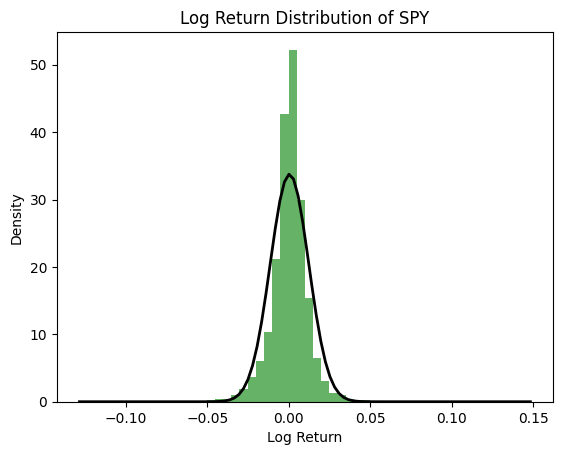

In [3]:
plt.hist(history["Log Return"].dropna(), bins=50, density=True, alpha=0.6, color='g')
# plot a normal pd
mu, std = norm.fit(history["Log Return"].dropna())
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title(f"Log Return Distribution of {ticker_str}")
plt.xlabel("Log Return")
plt.ylabel("Density")
plt.show()

In [4]:
# get mean, var, skew and kurtosis
mean = history["Log Return"].mean()
var = history["Log Return"].var()
skew = history["Log Return"].skew()
kurtosis = history["Log Return"].kurtosis()
print(f"Mean: {mean}")
print(f"Variance: {var}")
print(f"Skewness: {skew}")
print(f"Kurtosis: {kurtosis}")

Mean: 0.00039100067862792113
Variance: 0.0001395857426601269
Skewness: -0.2442510509304108
Kurtosis: 11.30696688480258


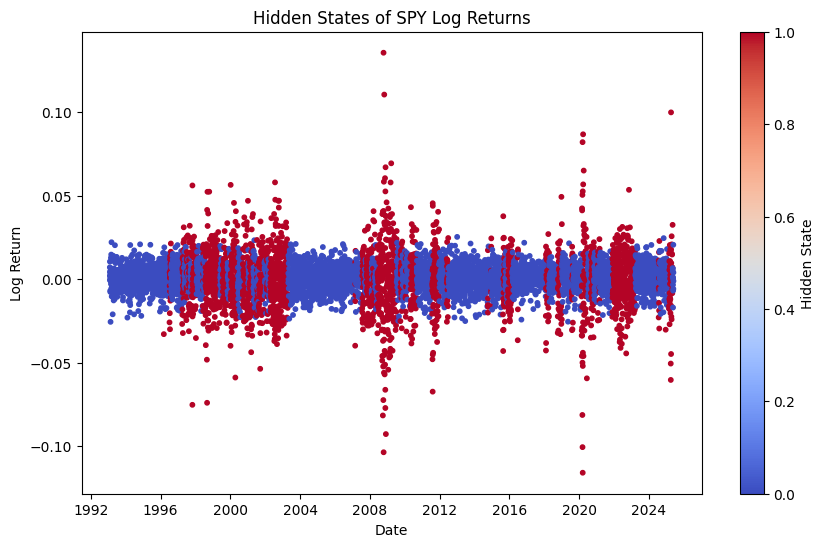

In [17]:
# hmm
from hmmlearn import hmm

# fit hmm
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=1000)
model.fit(history["Log Return"].dropna().values.reshape(-1, 1) * 1000)
# predict states
hidden_states = model.predict(history["Log Return"].dropna().values.reshape(-1, 1)*1000)
# plot log return coloured by hidden states
plt.figure(figsize=(10, 6))
plt.scatter(history.index[1:], history["Log Return"].dropna(), c=hidden_states, cmap='coolwarm', s=10)
plt.title(f"Hidden States of {ticker_str} Log Returns")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.colorbar(label='Hidden State')
plt.show()

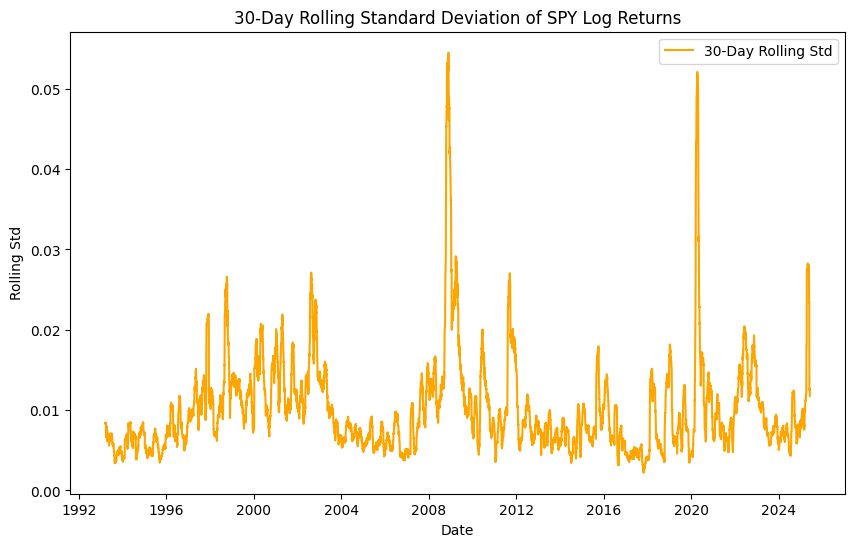

In [18]:
# rolling std
history["Rolling Std"] = history["Log Return"].rolling(window=30).std()
# plot rolling std
plt.figure(figsize=(10, 6))
plt.plot(history.index, history["Rolling Std"], label='30-Day Rolling Std', color='orange')
plt.title(f"30-Day Rolling Standard Deviation of {ticker_str} Log Returns")
plt.xlabel("Date")
plt.ylabel("Rolling Std")
plt.legend()
plt.show()

In [21]:
# engle arch test
from statsmodels.stats.diagnostic import het_arch
arch_test = het_arch(history["Log Return"].dropna().values * 1000)
print(f"Engle ARCH Test Statistic: {arch_test[0]}")
print(f"Engle ARCH Test p-value: {arch_test[1]}")

Engle ARCH Test Statistic: 1992.2268987585908
Engle ARCH Test p-value: 0.0
